## Introduction to Probabilistic Graphical Models
### Practical Session 2
#### Yanis Daci

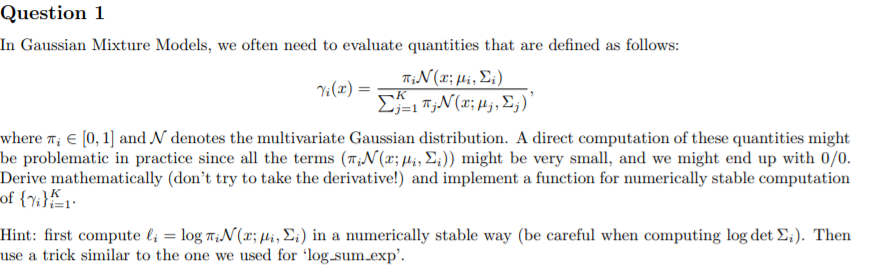

First of all, we will compute $l_i= \log( \pi_i \mathcal{N}(x ; \mu_i, \Sigma_i)) $

We will use the Cholesky decomposition : $ \Sigma = C \times C^T $  where $ \Sigma $ is a Hermitian positive-definite matrix and C a lower triangular matrix with real and positive diagonal entries.

$l_i = \log(\pi_i \times \exp(\frac{\frac{-1}{2} \times (x - \mu_i )^T \times \Sigma_i^{-1} \times (x- \mu_i)}{\sqrt{2\pi^D \times \left| \Sigma_i \right|}} ) ) $ where $ D $ is the number of Gaussians.

$= \log(\pi_i) + \frac{-1}{2} \times (x- \mu_i)^T \times \Sigma_i^{-1} \times (x- \mu_i) - \log((2 \pi^D \times \left| \Sigma_i \right|)^{\frac{1}{2}})$

$= \log( \pi_i) - \frac{1}{2} \times \log(2 \pi^D \times \left| \Sigma_i \right|) - \frac{1}{2} \times (x- \mu_i)^T \times \Sigma_i^{-1} \times (x- \mu_i) $

$= \log( \pi_i) - \frac{1}{2} \times \log(2 \pi^D) - \frac{1}{2} \times \log(\left| \Sigma_i \right|) - \frac{1}{2} \times (x- \mu_i)^T \times \Sigma_i^{-1} \times (x- \mu_i) $ 

(We use Cholensky decomposition : $ \log(\left| \Sigma_i \right|) = \log(\det( C \times C^T)) = 2 \times \log(\det(C)) = 2\times \log(\prod_{j=1}^{2}Cjj) = 2 \times \displaystyle \sum_{j=1}^{2} \log(C_{jj}))$

$= \log( \pi_i) - \frac{D}{2} \times \log(2 \pi) - \displaystyle \sum_{j=1}^{2} \log(C_{jj}) - \frac{1}{2} \times (x- \mu_i)^T \times \Sigma_i^{-1} \times (x- \mu_i)$ 



We notice that $ \gamma_i (x) = \frac{\exp(l_i)}{\displaystyle \sum_{j=1}^{K} \exp(l_j)}$; so we can now compute $ \gamma_i $ without end up with 0/0

In [1]:
import numpy as np

def l_i(x, pi_i , mu_i , sigma_i):
    
    return np.log(pi_i) - len(mu_i)/2 *(np.log(2 * np.pi)) - np.sum(np.log(np.diagonal(np.linalg.cholesky(sigma_i)))) -0.5* np.dot(np.dot((x-mu_i).T,np.linalg.inv(sigma_i)),(x-mu_i))



In [2]:
def gamma_i(i,x, pi_i , mu_i , sigma_i):
    
    numerator= np.exp(l_i(x, pi_i[i] , mu_i[i] , sigma_i[i]))
    denominator = 0
    
    for k in range(len(mu_i)):
        
        denominator= denominator + np.exp(l_i(x, pi_i[k] , mu_i[k] , sigma_i[k]))
        
    return numerator / denominator 
        
        

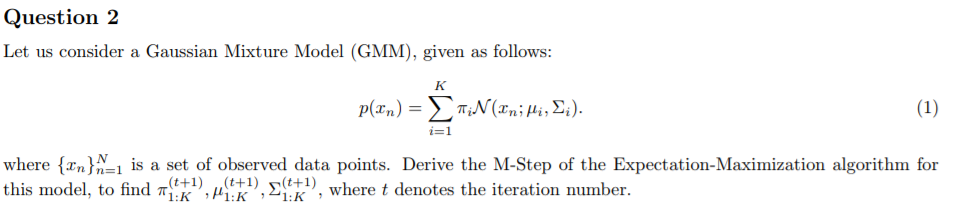

We define $ \theta = \{ \pi_{1:K}, \mu_{1:K}, \Sigma_{1:K}\}$ and the log-likelihood $ L_t(\theta)= \displaystyle \sum_{n=1}^{N} \displaystyle \sum_{k=1}^{K} \gamma_k(x_n) \times \log( \pi_k \times \mathcal{N}(x_n; \mu_k,\Sigma_k))$

During the M step, we want to  find the parameters in order to maximize the log-likelihood:

$ \theta^{(t+1)} =  \underset{\theta}{\arg \max} \text{ } L_t(\theta)$

So, at the optimum, we shall satisfy that :

$\frac{\partial L_t(\theta)} {\partial \theta} = 0$ 

We will use this equation in order to find $\pi_{1:K}^{(t+1)},\mu_{1:K}^{(t+1)},\Sigma_{1:K}^{(t+1)}$


### Computation of $ \mu_{1:K}^{(t+1)}$

We define $j$ ,an integer between 1 and K

$\frac{\partial L_t(\theta)} {\partial \mu_j} = \displaystyle \sum_{n=1}^{N} \displaystyle \sum_{k=1}^{K} \gamma_k(x_n) \times  \frac{\partial (\log( \pi_k \times \mathcal{N}(x_n; \mu_k,\Sigma_k)))} {\partial \mu_j} $ 

$= \displaystyle \sum_{n=1}^{N} \displaystyle \sum_{k=1}^{K} \gamma_k(x_n) \times  \frac{\partial (\frac{-1}{2} \times (x_n-\mu_k)^T \times \Sigma_k^{-1} \times (x_n-\mu_k))} {\partial \mu_j}$

$= \frac{-1}{2} \times \displaystyle \sum_{n=1}^{N} \displaystyle \sum_{k=1}^{K} \gamma_k(x_n) \times  \frac{\partial ( x_n^T \times \Sigma_k^{-1} \times x_n -\mu_k^T \times \Sigma_k^{-1} \times x_n -\mu_k^T \times \Sigma_k^{-1} \times x_n + \mu_k^T \times \Sigma_k^{-1} \times \mu_k)} {\partial \mu_j} $

$= \frac{-1}{2} \times \displaystyle \sum_{n=1}^{N} \gamma_j(x_n) \times (- \Sigma_j^{-1} \times x_n -(\Sigma_j^{-1})^T \times x_n + \Sigma_j^{-1} \times \mu_j + (\Sigma_j^{-1})^T \times \mu_j)$

$= \displaystyle \sum_{n=1}^{N} \gamma_j(x_n) \times \Sigma_j^{-1} \times (\mu_j-x_n) = 0$

So $ \mu_j= \frac{\displaystyle \sum_{n=1}^{N} \gamma_j(x_n) \times x_n}{\displaystyle \sum_{n=1}^{N} \gamma_j(x_n)}$

Finally, we have : $ \mu_{1:K}^{(t+1)}= \frac{\displaystyle \sum_{n=1}^{N} \gamma_{1:K}^{(t)}(x_n) \times x_n}{\displaystyle \sum_{n=1}^{N} \gamma_{1:K}^{(t)}(x_n)}$

### Computation of $ \Sigma_{1:K}^{(t+1)}$

We derive by $\Sigma_j^{-1}$  to facilitate the computations

$\frac{\partial L_t(\theta)} {\partial \Sigma_j^{-1}} = \displaystyle \sum_{n=1}^{N} \displaystyle \sum_{k=1}^{K} \gamma_k(x_n) \times  \frac{\partial (\frac{1}{2} \times \log(\left| \Sigma_k^{-1} \right|) -\frac{1}{2} \times (x_n - \mu_k)^T \times \Sigma_k^{-1} \times (x_n-\mu_k))} {\partial \Sigma_j^{-1}} $

($\frac{\partial \left| M \right| } {\partial M} = \left| M \right| \times M^{-1}$ )

$= \frac{1}{2} \times \displaystyle \sum_{n=1}^{N} \gamma_j(x_n) \times (\frac{\left| \Sigma_j^{-1} \right| \times \Sigma_j}{\left| \Sigma_j^{-1} \right|} - (x_n-\mu_j) \times (x_n-\mu_j)^T)$

$= \frac{1}{2} \times \displaystyle \sum_{n=1}^{N} \gamma_j(x_n) \times (\Sigma_j - (x_n - \mu_j) \times (x_n-\mu_j)^T)=0 $

So $ \Sigma_j= \frac{\displaystyle \sum_{n=1}^{N} \gamma_j(x_n) \times (x_n - \mu_j) \times (x_n-\mu_j)^T}{\displaystyle \sum_{n=1}^{N} \gamma_j(x_n)} $


Finally, we have : $ \Sigma_{1:K}^{(t+1)}= \frac{\displaystyle \sum_{n=1}^{N} \gamma_{1:K}^{(t)}(x_n) \times (x_n - \mu_{1:K}^{(t)}) \times (x_n-\mu_{1:K}^{(t)})^T}{\displaystyle \sum_{n=1}^{N} \gamma_{1:K}^{(t)}(x_n)} $

### Computation of $ \pi_{1:K}^{(t+1)}$

In this case, we have a constraint :

$\displaystyle \sum_{k=1}^{K} \pi_k = 1 $

So we have to minimize this function :

$ L_t(\theta) + C \times (\displaystyle \sum_{k=1}^{K} \pi_k -1)$ where $C$ is a constant.

Thus, we have this equation : $\frac{\partial L_t(\theta)} {\partial \pi_j} + C =0 $

$\frac{\partial L_t(\theta)} {\partial \pi_j} = \displaystyle \sum_{n=1}^{N} \displaystyle \sum_{k=1}^{K} \gamma_k(x_n) \times \frac{\partial (\log(\pi_k))} {\partial \pi_j} $

$= \displaystyle \sum_{n=1}^{N} \gamma_j(x_n) \times \frac{1}{\pi_j}$

So $ \frac{\displaystyle \sum_{n=1}^{N} \gamma_j(x_n)}{\pi_j} + C =0 $

Thus, $ C \times \pi_j = - \displaystyle \sum_{n=1}^{N} \gamma_j(x_n)  $

$ C \times \displaystyle \sum_{k=1}^{K} \pi_k = -\displaystyle \sum_{n=1}^{N}\displaystyle \sum_{k=1}^{K} \gamma_k(x_n)$


We know that $\displaystyle \sum_{k=1}^{K} \pi_k=1$


So $ C= - \displaystyle \sum_{n=1}^{N} \displaystyle \sum_{k=1}^{K} \gamma_k(x_n)= -\displaystyle \sum_{n=1}^{N} 1 = -N $


Thus, $ \pi_j = \frac{\displaystyle \sum_{n=1}^{N} \gamma_j(x_n)}{N} $

Finally, we have : $ \pi_{1:K}^{(t+1)} = \frac{\displaystyle \sum_{n=1}^{N} \gamma_{1:K}^{(t)}(x_n)}{N} $


We will use these expressions to implement EM algorithm for GMMs

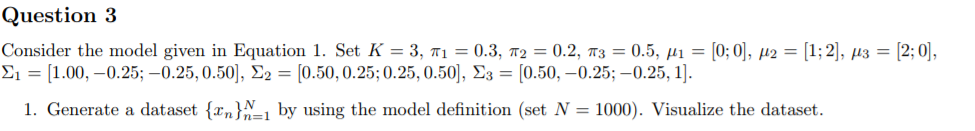

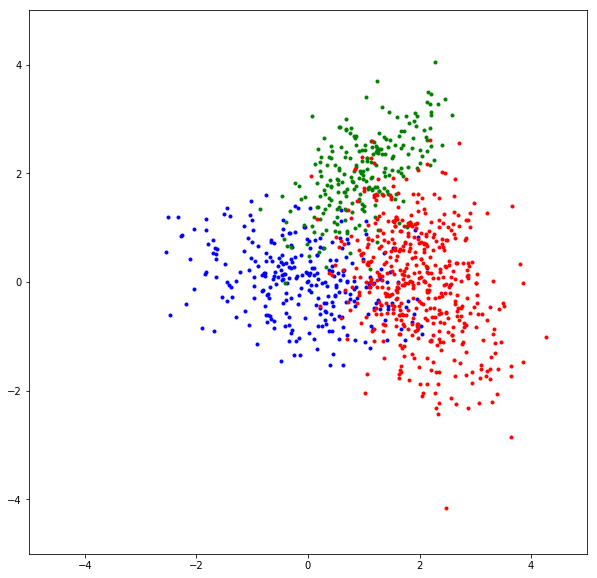

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

K=3
pi= [0.3,0.2,0.5]
mu=[ [0,0] ,[1,2],[2,0] ]
sigma=[ [[1.00,-0.25],[-0.25,0.50]] , [[0.50,0.25],[0.25,0.50]] ,[[0.50,-0.25],[-0.25,1]] ]
N=1000


# Number of points from each cluster center

C = np.random.multinomial(N, pi) 

L = []

for i in range(K):
    x = np.random.multivariate_normal(mu[i], sigma[i], C[i])
    L.append(x)


plt.figure(figsize=(10,10))
plt.rc('text', usetex=False)

ax = plt.gca()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

color= ['b','g','r']
for i in range(K):
    plt.plot(L[i][:,0],L[i][:,1],'.k',color=color[i])

    
plt.show()

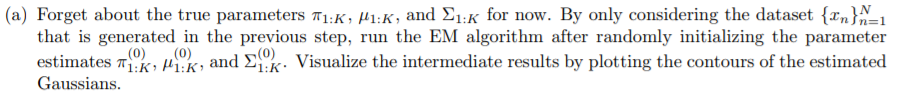

In [4]:
# Now, we modify the data used in the previous question to apply the EM
X = []
for i in range(K):
    for j in range(len(L[i])):
        X.append(L[i][j])

print(l_i(X[0], pi[0] , mu[0] , sigma[0]))
print(gamma_i(0,X[0], pi , mu , sigma))

-3.9494225324260417
0.9949437479748028


In [5]:
random = np.random.rand(K)
pi = random/np.sum(random)

mu = []
sigma = []

for i in range(K):
    random = np.random.randn(2)
    mu.append(random)
    A = np.random.randn(2,2)
    sigma.append(A.dot(A.T)) #computation to have a positive,definite and inversible matrix

In [6]:
max_iter=80
    
for z in range(max_iter): #we put a number of maximum iteration to stop the algorithm.
                          #in the next question, we will use the log-likelihood to stop it.
    
    gammas = np.zeros((K, N))
    
    #E step
    
    for j in range(K):
        for i in range(N):
            gammas[j,i]= gamma_i(j,X[i], pi , mu , sigma)  
            
    
    #M step
    
    pi = np.zeros(K)
        
    for j in range(K):
        for i in range(N):
            pi[j] = pi[j] + gammas[j, i]
    pi = pi/ N
        
    
    mu = np.zeros((K,2))
        
    for j in range(K):
            
        for i in range(N):
                
            mu[j] = mu[j]+ gammas[j, i] * X[i] 
        
        mu[j] = mu[j] / (gammas[j, :].sum())
        
    
    sigma = np.zeros((K, 2, 2))
    
    for j in range(K):
        
        for i in range(N):
            
            y = np.reshape(X[i]- mu[j],(2,1)) #we need this to have a 2x2 matrix
            sigma[j] = sigma[j] + gammas[j, i] * np.dot(y, y.T)
        
        sigma[j] = sigma[j] / (gammas[j,:].sum())

In [7]:
print(mu)
print("--------------------------------------------------------------")
print(pi)
print("--------------------------------------------------------------")
print(sigma)

[[7.20492878e-02 8.62049018e-04]
 [1.02627265e+00 2.07537023e+00]
 [1.90541402e+00 1.72530792e-01]]
--------------------------------------------------------------
[0.31814514 0.18380718 0.49804769]
--------------------------------------------------------------
[[[ 1.1362923  -0.21505778]
  [-0.21505778  0.44008173]]

 [[ 0.49052212  0.30151568]
  [ 0.30151568  0.44279017]]

 [[ 0.58137949 -0.36550294]
  [-0.36550294  1.27632266]]]


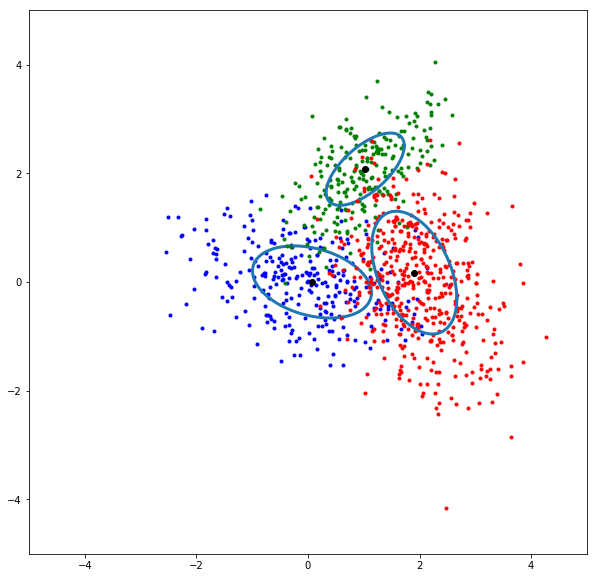

In [8]:
def ellipse_gaussian(sigma,mu):
    
    T = np.arange(0, 2 * np.pi + np.pi/36, np.pi/36) #Create an ellipse from segments y= Sigma_Cholesky* X + mu
                                                     # Where X is on the unit cercle.
    X = np.array([np.cos(T),np.sin(T)])
    
    Y = np.dot(sigma, X)
    ln = plt.Line2D(mu[0]+Y[0,:],mu[1]+Y[1,:],markeredgecolor='black', linewidth=3)
    return ln

color = ['b','g','r']
plt.figure(figsize=(10,10))
plt.rc('text', usetex=False)

ax = plt.gca()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

for i in range(K):
    
    M = np.linalg.cholesky(sigma[i])
    
    plt.plot(L[i][:,0], L[i][:,1], '.',color=color[i])
    plt.plot(mu[i][0],mu[i][1],'o',color='black')
    
    ln = ellipse_gaussian(M, mu[i])
    ax.add_line(ln)

The ellipses represent the estimations of the Gaussians.

We have good results when data of the same "color" are in the same ellipse. So the estimations of the parameters are closed to the parameters true values.

We chose the initialization parameters randomly so, sometimes, when the initialization value chosen for a paramater is too high or too low, it can lead to bad results.

So we have to be careful when we choose the initialization values.

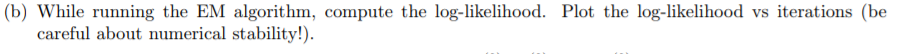

For this question, we will use a different formula for the log-likelihood :

$ L_t(\theta) = \displaystyle \sum_{n=1}^{N} \log(\displaystyle \sum_{k=1}^{K} \pi_k \times \mathcal{N}(x_n; \mu_k, \Sigma_k)) $

With this formula, we will not have problem about the numerical stability.

Indeed, we will use the function $l_i$ created in the first exercise to compute $L_t(\theta)$.

In [9]:
random = np.random.rand(K)
pi = random/np.sum(random)

mu = []
sigma = []

for i in range(K):
    random = np.random.randn(2)
    mu.append(random)
    A = np.random.randn(2,2)
    sigma.append(A.dot(A.T)) #computation to have a positive,definite and inversible matrix

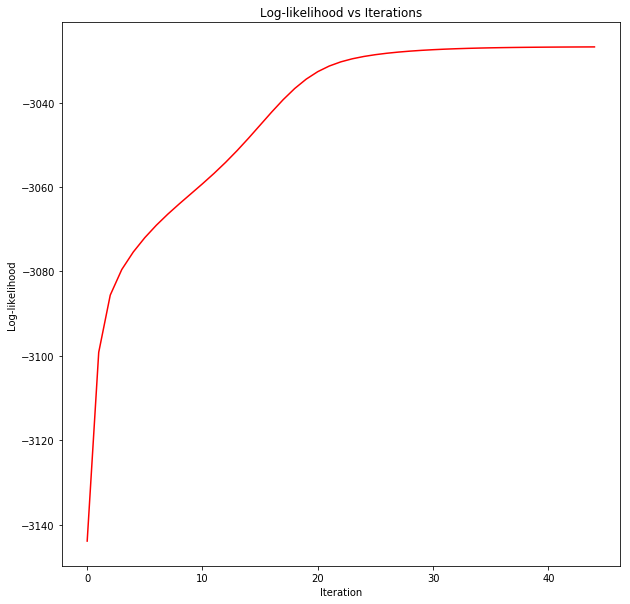

In [10]:
max_iter=80
itera=0 

 
loglikelihood_old = 0.0

loglikelihood=[]

for z in range(max_iter):
    
    gammas = np.zeros((K, N))
    
    #E step
    
    for j in range(K):
        for i in range(N):
            gammas[j,i]= gamma_i(j,X[i], pi , mu , sigma)  
            
    
    #M step
    
    pi = np.zeros(K)
        
    for j in range(K):
        for i in range(N):
            pi[j] = pi[j] + gammas[j, i]
    pi = pi/ N
        
    
    mu = np.zeros((K,2))
        
    for j in range(K):
            
        for i in range(N):
                
            mu[j] = mu[j]+ gammas[j, i] * X[i] 
        
        mu[j] = mu[j] / (gammas[j, :].sum())
        
    
    sigma = np.zeros((K, 2, 2))
    
    for j in range(K):
        
        for i in range(N):
            
            y = np.reshape(X[i]- mu[j],(2,1))
            sigma[j] = sigma[j] + gammas[j, i] * np.dot(y, y.T)
        
        sigma[j] = sigma[j] / (gammas[j,:].sum())
    
    
    #computation of log likelihood
    
    loglikelihood_new = 0.0
    
    for i in range(N):
        
        y = 0
        
        for j in range(K):
            
            y = y + np.exp(l_i(X[i], pi[j] , mu[j] , sigma[j]))
        
        loglikelihood_new = loglikelihood_new + np.log(y)
        
     
    loglikelihood.append(loglikelihood_new)
    
    itera=itera+1
    
    if np.abs(loglikelihood_new - loglikelihood_old) < 0.01: #condition to stop the algorithm and decide we reached the convergence.
        
        break
    
    loglikelihood_old = loglikelihood_new



x = list(range(itera))

plt.figure(figsize=(10,10))
plt.plot(x,loglikelihood,'r')
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs Iterations')
plt.show()

We can remark that the value of the log-likelihood increases when the number of iteration is bigger.

It is normal because the log function is a monotonically increasing function.

We use the log-likelihood because it is a concave function while the likelihood is not a concave function.

It is generally easier to maximize a concave function than a non concave function.


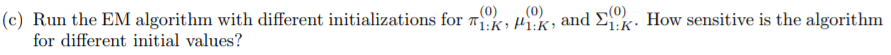

In [11]:
def EM_algorithm(X,max_iter, pi , mu , sigma ):
    
    N=len(X)
    K=len(mu)
    loglikelihood_old = 0.0

    loglikelihood=[]

    for z in range(max_iter):
    
        gammas = np.zeros((K, N))
    
        #E step
    
        for j in range(K):
            for i in range(N):
                gammas[j,i]= gamma_i(j,X[i], pi , mu , sigma)  
            
    
        #M step
    
        pi = np.zeros(K)
        
        for j in range(K):
            for i in range(N):
                pi[j] = pi[j] + gammas[j, i]
        pi = pi/ N
        
    
        mu = np.zeros((K,2))
        
        for j in range(K):
            
            for i in range(N):
                
                mu[j] = mu[j]+ gammas[j, i] * X[i] 
        
            mu[j] = mu[j] / (gammas[j, :].sum())
        
    
        sigma = np.zeros((K, 2, 2))
    
        for j in range(K):
        
            for i in range(N):
            
                y = np.reshape(X[i]- mu[j],(2,1))
                sigma[j] = sigma[j] + gammas[j, i] * np.dot(y, y.T)
        
            sigma[j] = sigma[j] / (gammas[j,:].sum())
    
    
        #computation log likelihood
    
        loglikelihood_new = 0.0
    
        for i in range(N):
        
            y = 0
        
            for j in range(K):
            
                y = y + np.exp(l_i(X[i], pi[j] , mu[j] , sigma[j]))
        
            loglikelihood_new = loglikelihood_new + np.log(y)
        
        if np.abs(loglikelihood_new - loglikelihood_old) < 0.01: #condition to stop the algorithm and decide we reach the convergence.
        
            break
    
        loglikelihood_old = loglikelihood_new
        
    return pi,mu,sigma

In [12]:
pi_test= [0.1,0.3,0.6]
mu_test=[ [2,2] ,[1,3],[4,0] ]
sigma_test=[ [[3.00,-0.50],[-0.5,1.50]] , [[2.50,1.25],[0.75,0.50]] ,[[1.50,-0.50],[-0.25,1]] ]

EM_algorithm(X,100,pi_test,mu_test,sigma_test)

(array([0.33325551, 0.18501633, 0.48172816]), array([[0.12944699, 0.00581724],
        [1.02999473, 2.0789457 ],
        [1.92399109, 0.16833814]]), array([[[ 1.18628617, -0.21140342],
         [-0.21140342,  0.44520954]],
 
        [[ 0.48266077,  0.29217415],
         [ 0.29217415,  0.43513672]],
 
        [[ 0.57074367, -0.36504539],
         [-0.36504539,  1.289936  ]]]))

In [13]:
pi_test= [0.01,0.2,0.79]
mu_test=[ [5,1] ,[7,2],[10,0] ]
sigma_test=[ [[9.00,-2.50],[-1.5,4.50]] , [[6.50,2.25],[2.75,9.50]] ,[[9.50,-4.50],[-2.25,6]] ]

EM_algorithm(X,100,pi_test,mu_test,sigma_test)

(array([0.30599342, 0.5062577 , 0.18774888]), array([[0.0204087 , 0.00372089],
        [1.89904288, 0.15361024],
        [1.02741194, 2.07066925]]), array([[[ 1.08716441, -0.21053183],
         [-0.21053183,  0.43605457]],
 
        [[ 0.58459937, -0.35301517],
         [-0.35301517,  1.24261872]],
 
        [[ 0.48999472,  0.29940569],
         [ 0.29940569,  0.44799032]]]))

In [14]:
pi_test= [0.01,0.01,0.98]
mu_test=[ [100,3] ,[140,5],[150,6] ]
sigma_test=[ [[90.00,-2.50],[-1.5,40.50]] , [[60.50,2.25],[20.75,9.50]] ,[[90.50,-4.50],[-2.25,60]] ]

EM_algorithm(X,100,pi_test,mu_test,sigma_test)

(array([1.00000000e+00, 9.15462440e-43, 1.31681775e-28]),
 array([[ 1.16054546,  0.46767076],
        [ 2.55721301, -3.89991316],
        [ 1.83825541,  0.375497  ]]),
 array([[[ 1.39781331, -0.18255055],
         [-0.18255055,  1.44486425]],
 
        [[ 0.06816484,  0.141014  ],
         [ 0.141014  ,  0.4839639 ]],
 
        [[ 0.79060935, -0.53934815],
         [-0.53934815,  2.05445852]]]))

After running the algorithm with different initializations value (choosen randomly like the question 2.(a) ), we can notice that the algorithm does not give the same estimation for $ \pi_{1:K} $ , $  \mu_{1:K}$ and $\Sigma _{1:K} $ .

Indeed, when the initialization value of a paramater is not too small or too large, the true value can be reached without use a lot of iteration. Otherwise, we will need a large number of iterations and , sometimes, the results will not match with the true parameters.

To confirm this idea, we apllied the algorithm three times with different initializations values :

- For the first test, we took consistent values as initializations value. The estimations of the paramaters are not very bad but we can do better.


- For the second test , we took other consistent values as initializations value with some big coefficients. We can notice that we obtain better result. The results are different of the previous one.


- For the last test, we took very big values as initilizations value. The estimations of the parameters are very bad and are very different of the previous tests results.

Thus, we can deduce that the algorithm is very sensitive to the choice of the initial values.

Now, we will study each paramaters with different initialization value to verify if they all have the same effect on the algorithm.

In [15]:
def plot_ellipse(sigma,mu):
    color = ['b','g','r']
    plt.figure(figsize=(10,10))
    plt.rc('text', usetex=False)

    ax = plt.gca()
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)

    for i in range(K):
    
        M = np.linalg.cholesky(sigma[i])
    
        plt.plot(L[i][:,0], L[i][:,1], '.',color=color[i])
        plt.plot(mu[i][0],mu[i][1],'o',color='black')
    
        ln = ellipse_gaussian(M, mu[i])
        ax.add_line(ln)

### Study of $\mu_{1:K}^{(0)}$

In [16]:
pi_test= [0.3,0.2,0.5]
mu_test=[ [-4,-4] ,[1,5],[2,5] ]
sigma_test=[ [[1.00,-0.25],[-0.25,0.50]] , [[0.50,0.25],[0.25,0.50]] ,[[0.50,-0.25],[-0.25,1]] ]

pi_r,mu_r,sigma_r = EM_algorithm(X,100,pi_test,mu_test,sigma_test)

print(pi_r)
print("-----------------------------------")
print(mu_r)
print("-----------------------------------")
print(sigma_r)

[0.06345331 0.22270501 0.71384169]
-----------------------------------
[[-1.12114327  0.06054411]
 [ 0.11531324  0.12000016]
 [ 1.68945704  0.61232681]]
-----------------------------------
[[[ 0.58379295 -0.22772981]
  [-0.22772981  0.4484771 ]]

 [[ 0.56301195 -0.13308271]
  [-0.13308271  0.49119564]]

 [[ 0.64725377 -0.46642368]
  [-0.46642368  1.75758972]]]


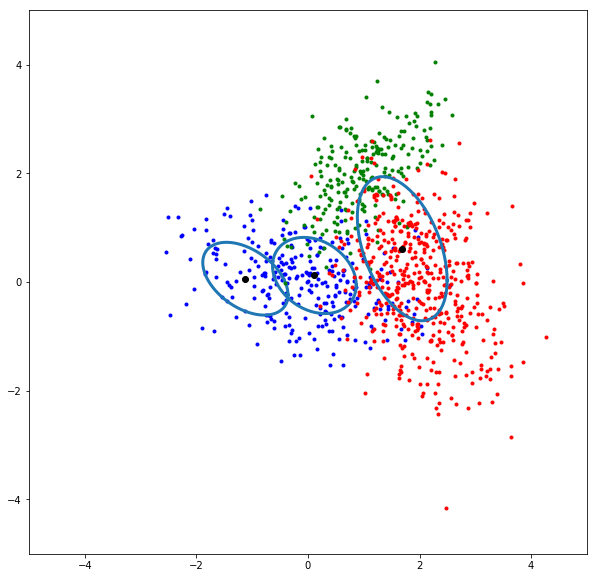

In [17]:
plot_ellipse(sigma_r,mu_r)

When we change only the value of $\mu_{1:K}^{(0)}$, the results are not good.

The estimated paramaters don't converge to the true parameters values.

Moreover,we can see that the center of the ellipses are not well placed. We don't have a good representation.

Thus, we can say that $\mu_{1:K}^{(0)}$ has a big impact on our results

### Study of $\pi_{1:K}^{(0)}$

In [18]:
pi_test= [0.01,0.01,0.98]
mu_test=[ [0,0] ,[1,2],[2,0] ]
sigma_test=[ [[1.00,-0.25],[-0.25,0.50]] , [[0.50,0.25],[0.25,0.50]] ,[[0.50,-0.25],[-0.25,1]] ]

pi_r,mu_r,sigma_r = EM_algorithm(X,100,pi_test,mu_test,sigma_test)

print(pi_r)
print("-----------------------------------")
print(mu_r)
print("-----------------------------------")
print(sigma_r)

[0.30137935 0.18138481 0.51723584]
-----------------------------------
[[-0.00369924  0.00853222]
 [ 1.03683999  2.08805517]
 [ 1.88230056  0.16696026]]
-----------------------------------
[[[ 1.06310564 -0.20736633]
  [-0.20736633  0.43634832]]

 [[ 0.48942996  0.29887505]
  [ 0.29887505  0.4371715 ]]

 [[ 0.5953011  -0.36105202]
  [-0.36105202  1.25185477]]]


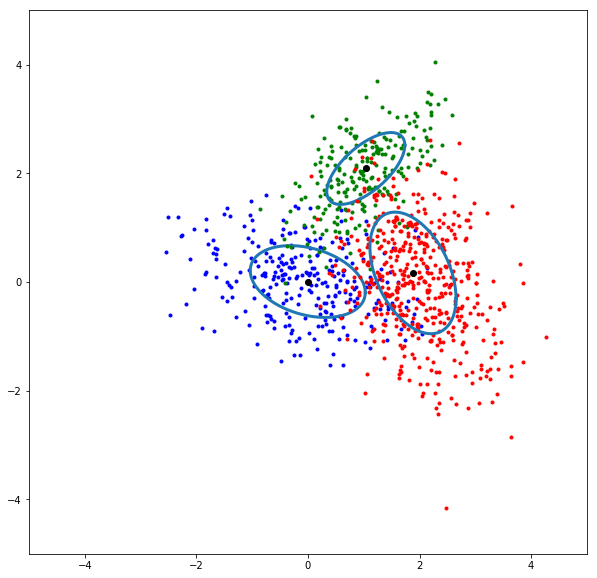

In [19]:
plot_ellipse(sigma_r,mu_r)

We can notice that when we only modify the value of $ \pi_{1:K}^{(0)}$ , we don't have significant impact on the results.

The value of estimated parameters are closed to the parmaters value and the ellipses give a good representation of the models.

Thus, we can deduce that $ \pi_{1:K}^{(0)}$ does not have significant impact on the algorithm result.

### Study of $ \Sigma_{1:K}^{(0)}$

In [20]:
pi_test= [0.3,0.2,0.5]
mu_test=[ [0,0] ,[1,2],[2,0] ]
sigma_test=[ [[20.00,-5.25],[-10.25,25.50]] , [[30,10.25],[10.25,25.50]] ,[[13.50,-5.25],[-10.25,25]] ]

pi_r,mu_r,sigma_r = EM_algorithm(X,100,pi_test,mu_test,sigma_test)

print(pi_r)
print("-----------------------------------")
print(mu_r)
print("-----------------------------------")
print(sigma_r)

[0.32595531 0.18617287 0.48787182]
-----------------------------------
[[ 0.11748686 -0.01437099]
 [ 1.00843892  2.05336287]
 [ 1.91547449  0.18462761]]
-----------------------------------
[[[ 1.18890598 -0.22910603]
  [-0.22910603  0.4406848 ]]

 [[ 0.4999111   0.31463577]
  [ 0.31463577  0.45956195]]

 [[ 0.57439058 -0.3713833 ]
  [-0.3713833   1.29689928]]]


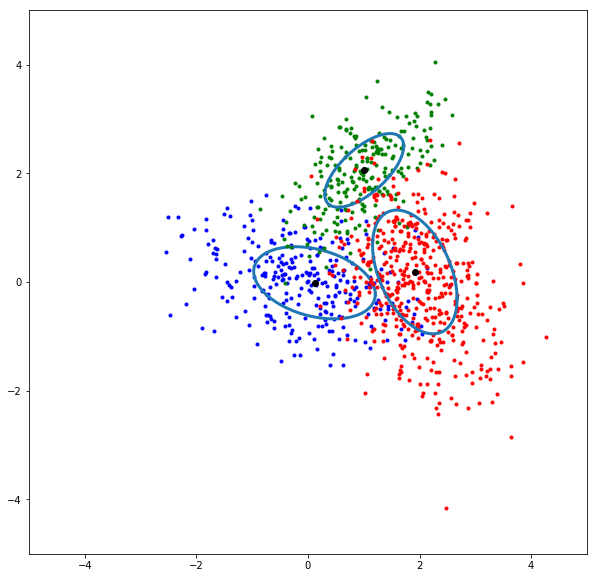

In [21]:
plot_ellipse(sigma_r,mu_r)

We can notice that when we change the value of $\Sigma_{1:K}^{(0)}$, it does not have big impact on the results.

The estimated parameters are not very closed to the true parameters but it still consistent.

In the representation, the size of the ellipses has changed a little but it still coherent.

**In conclusion**, we can say that $\mu_{1:K}^{(0)}$ has big impact on the algorithm.

However, $\Sigma_{1:K}^{(0)}$ has little impact and $\pi_{1:K}^{(0)}$ does not have impact on the algorithm.